In [1]:
#comparative study of various methods for performong anamoly detection 
#project contains 2 main methods 
#Lstm(long-short term memory)
#it is one the classical deep learning method used on sequential data
#it is as an benchmark to compare other models 

#STOC(stacked transformer with 1-D CNN)
#it is a research based method that is used for anamoly detection 
#it is taken from research paper "time-series anomaly detection with stacked transformer representations and 1d convolutional network"
#the model performnce is used to compare with lstm performance 

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-analysis/climate_data.csv


In [3]:
df=pd.read_csv('/kaggle/input/weather-analysis/climate_data.csv')

In [4]:
df

,Date,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),...,Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Date1,Month,diff_pressure
0,2009-01-01,37.8,35.0,12.7,29.7,26.4,36.8,274.0,0.00,0.00,...,4.0,27.0,29.762,29.596,41.4,59.0,40.0,2009-01-01,1,0.166
1,2009-01-02,43.2,32.0,14.7,29.5,12.8,18.0,240.0,0.00,0.00,...,4.0,16.0,29.669,29.268,35.7,51.0,52.0,2009-01-02,1,0.401
2,2009-01-03,25.7,60.0,12.7,29.7,8.3,12.2,290.0,0.00,0.00,...,8.0,35.0,30.232,29.260,25.3,38.0,41.0,2009-01-03,1,0.972
3,2009-01-04,9.3,67.0,0.1,30.4,2.9,4.5,47.0,0.00,0.00,...,7.0,35.0,30.566,30.227,12.7,20.0,32.0,2009-01-04,1,0.339
4,2009-01-05,23.5,30.0,-5.3,29.9,16.7,23.1,265.0,0.00,0.00,...,5.0,13.0,30.233,29.568,38.0,53.0,32.0,2009-01-05,1,0.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3897,2020-07-24,64.1,62.0,49.8,29.6,3.6,5.8,240.0,0.24,4.38,...,86.0,35.0,29.686,29.577,15.0,25.3,77.4,2020-07-24,7,0.109
3898,2020-07-25,62.8,60.0,48.1,29.7,2.5,4.0,242.0,0.33,4.47,...,90.0,36.0,29.781,29.645,8.1,17.3,77.5,2020-07-25,7,0.136
3899,2020-07-26,60.6,68.0,48.9,29.8,1.7,2.9,357.0,0.33,4.47,...,90.0,40.0,29.930,29.745,11.5,15.0,77.5,2020-07-26,7,0.185
3900,2020-07-27,61.7,64.0,47.4,29.9,2.2,4.0,66.0,0.33,4.47,...,96.0,35.0,29.941,29.781,13.8,18.4,78.2,2020-07-27,7,0.160


In [5]:
df.columns

Index(['Date', 'Average temperature (°F)', 'Average humidity (%)',
       'Average dewpoint (°F)', 'Average barometer (in)',
       'Average windspeed (mph)', 'Average gustspeed (mph)',
       'Average direction (°deg)', 'Rainfall for month (in)',
       'Rainfall for year (in)', 'Maximum rain per minute',
       'Maximum temperature (°F)', 'Minimum temperature (°F)',
       'Maximum humidity (%)', 'Minimum humidity (%)', 'Maximum pressure',
       'Minimum pressure', 'Maximum windspeed (mph)',
       'Maximum gust speed (mph)', 'Maximum heat index (°F)', 'Date1', 'Month',
       'diff_pressure'],
      dtype='object')

In [6]:
df.isna().sum()

Date                        0
Average temperature (°F)    0
Average humidity (%)        0
Average dewpoint (°F)       0
Average barometer (in)      0
Average windspeed (mph)     0
Average gustspeed (mph)     0
Average direction (°deg)    0
Rainfall for month (in)     0
Rainfall for year (in)      0
Maximum rain per minute     0
Maximum temperature (°F)    0
Minimum temperature (°F)    0
Maximum humidity (%)        0
Minimum humidity (%)        0
Maximum pressure            0
Minimum pressure            0
Maximum windspeed (mph)     0
Maximum gust speed (mph)    0
Maximum heat index (°F)     0
Date1                       0
Month                       0
diff_pressure               0
dtype: int64

In [7]:
new_df=df[['Date','Average temperature (°F)']]

In [8]:
new_df

,Date,Average temperature (°F)
0,2009-01-01,37.8
1,2009-01-02,43.2
2,2009-01-03,25.7
3,2009-01-04,9.3
4,2009-01-05,23.5
...,...,...
3897,2020-07-24,64.1
3898,2020-07-25,62.8
3899,2020-07-26,60.6
3900,2020-07-27,61.7


In [9]:
import pandas as pd

# Selecting relevant columns
new_df = df[['Date', 'Average temperature (°F)']].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Converting Date column to datetime
new_df['Date'] = pd.to_datetime(new_df['Date'], format='%Y-%m-%d')  # Correct format

# Styling the DataFrame
new_df.head().style.set_properties(subset=['Date'], **{'background-color': 'dodgerblue'})


,Date,Average temperature (°F)
0,2009-01-01 00:00:00,37.800000
1,2009-01-02 00:00:00,43.200000
2,2009-01-03 00:00:00,25.700000
3,2009-01-04 00:00:00,9.300000
4,2009-01-05 00:00:00,23.500000


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

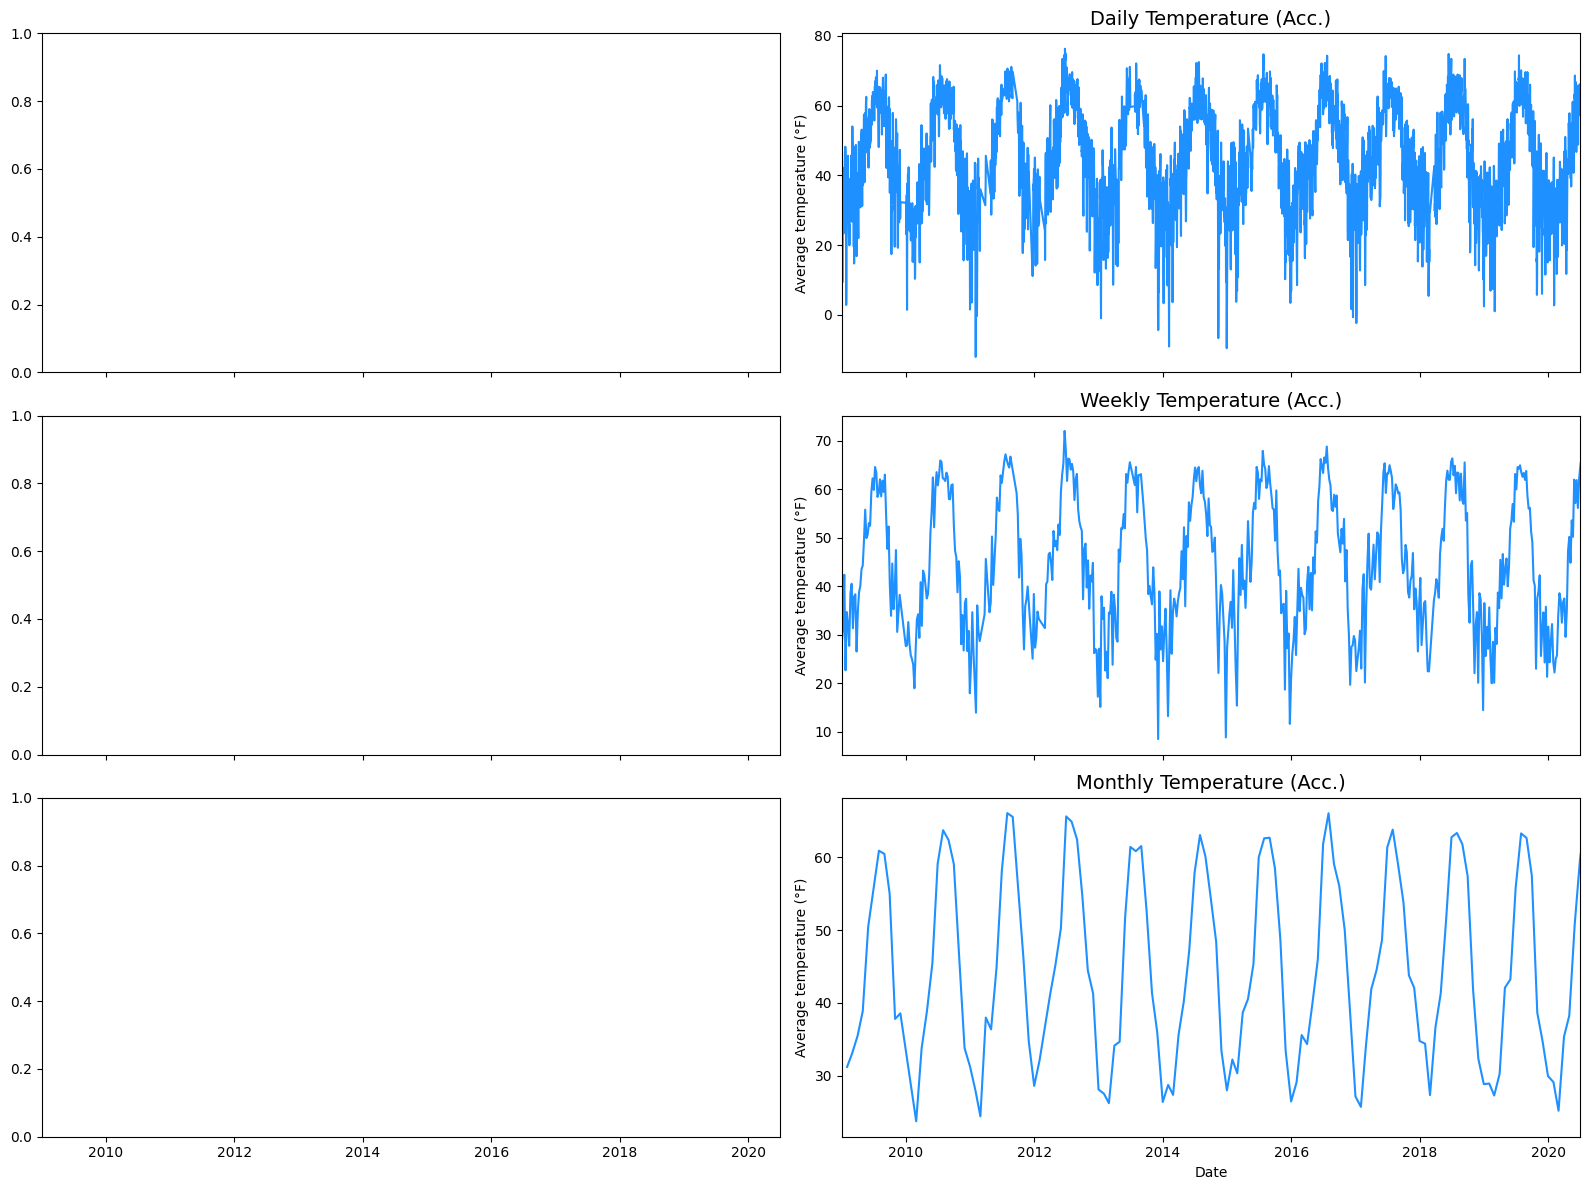

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import date

# Ensure Date is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create figure and axes
fig, ax = plt.subplots(ncols=2, nrows=3, sharex=True, figsize=(16, 12))

# Daily Temperature Plot
sns.lineplot(x=new_df['Date'], y=new_df['Average temperature (°F)'], color='dodgerblue', ax=ax[0, 1])
ax[0, 1].set_title('Daily Temperature (Acc.)', fontsize=14)

# Weekly Temperature Plot
resampled_df = df[['Date', 'Average temperature (°F)']].resample('7D', on='Date').mean().reset_index()
sns.lineplot(x=resampled_df['Date'], y=resampled_df['Average temperature (°F)'], color='dodgerblue', ax=ax[1, 1])
ax[1, 1].set_title('Weekly Temperature (Acc.)', fontsize=14)

# Monthly Temperature Plot
resampled_df = df[['Date', 'Average temperature (°F)']].resample('M', on='Date').mean().reset_index()
sns.lineplot(x=resampled_df['Date'], y=resampled_df['Average temperature (°F)'], color='dodgerblue', ax=ax[2, 1])
ax[2, 1].set_title('Monthly Temperature (Acc.)', fontsize=14)

# Set x-axis limits
for i in range(3):
    ax[i, 1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

plt.tight_layout()
plt.show()


In [11]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Average temperature (°F)'].values)
result

(-4.512659406610287,
 0.00018653825035297884,
 14,
 3887,
 {'1%': -3.4320334637908325,
  '5%': -2.8622838620843964,
  '10%': -2.5671659667263427},
 25494.11399077386)

In [12]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(new_df['Average temperature (°F)'])
print(f"ADF Statistic: {result[0]}, p-value: {result[1]}")

ADF Statistic: -4.512659406610287, p-value: 0.00018653825035297884


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from colorama import Fore
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Check column names
print("Columns in new_df:", new_df.columns)

# Ensure 'Average temperature (°F)' column exists
if 'Average temperature (°F)' not in new_df.columns:
    raise ValueError("Column 'Average temperature (°F)' not found in new_df!")

# Load and preprocess dataset
data = new_df[['Average temperature (°F)']].copy()  # Ensure it remains a DataFrame
dataset = data.values  # Convert to NumPy array

# Verify dataset
print("Dataset shape:", dataset.shape)
print("First 5 values:", dataset[:5])



Columns in new_df: Index(['Date', 'Average temperature (°F)'], dtype='object')
Dataset shape: (3902, 1)
First 5 values: [[37.8]
 [43.2]
 [25.7]
 [ 9.3]
 [23.5]]


In [14]:
train_size = int(len(new_df) * 0.8)
test_size = len(new_df) - train_size

scaler = MinMaxScaler(feature_range=(-1, 0))
scaled_data = scaler.fit_transform(dataset)  # No more empty dataset error ✅

# Define rolling window and split dataset
look_back = 52
train, test = scaled_data[:train_size-look_back, :], scaled_data[train_size-look_back:, :]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(look_back, len(dataset)):
        X.append(dataset[i-look_back:i, 0])
        Y.append(dataset[i, 0])
    return np.array(X), np.array(Y)

x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

# Reshape input for LSTM [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

print(len(x_train), len(x_test))  # Ensure no zero-length training/testing set

3017 781


In [15]:
# model.compile(optimizer='adam', loss='mean_squared_error')
# model.fit(x_train, y_train, batch_size=1, epochs=5, validation_data=(x_test, y_test))
# model.summary()

# # Predictions
# train_predict = model.predict(x_train)
# test_predict = model.predict(x_test)

# # Inverse transform predictions
# train_predict = scaler.inverse_transform(train_predict)
# test_predict = scaler.inverse_transform(test_predict)
# y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
# y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# # RMSE and MAE calculations
# score_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
# score_mae = mean_absolute_error(y_test, test_predict)
# print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
3017/3017 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 0.0129 - val_loss: 0.0106
Epoch 2/5
3017/3017 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.0085 - val_loss: 0.0066
Epoch 3/5
3017/3017 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.0077 - val_loss: 0.0075
Epoch 4/5
3017/3017 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.0073 - val_loss: 0.0135
Epoch 5/5
3017/3017 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.0066 - val_loss: 0.0061


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 128)              │          92,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 431,195 (1.64 MB)

 Trainable params: 143,731 (561.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 287,464 (1.10 MB)

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
RMSE: 6.915101895373457


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

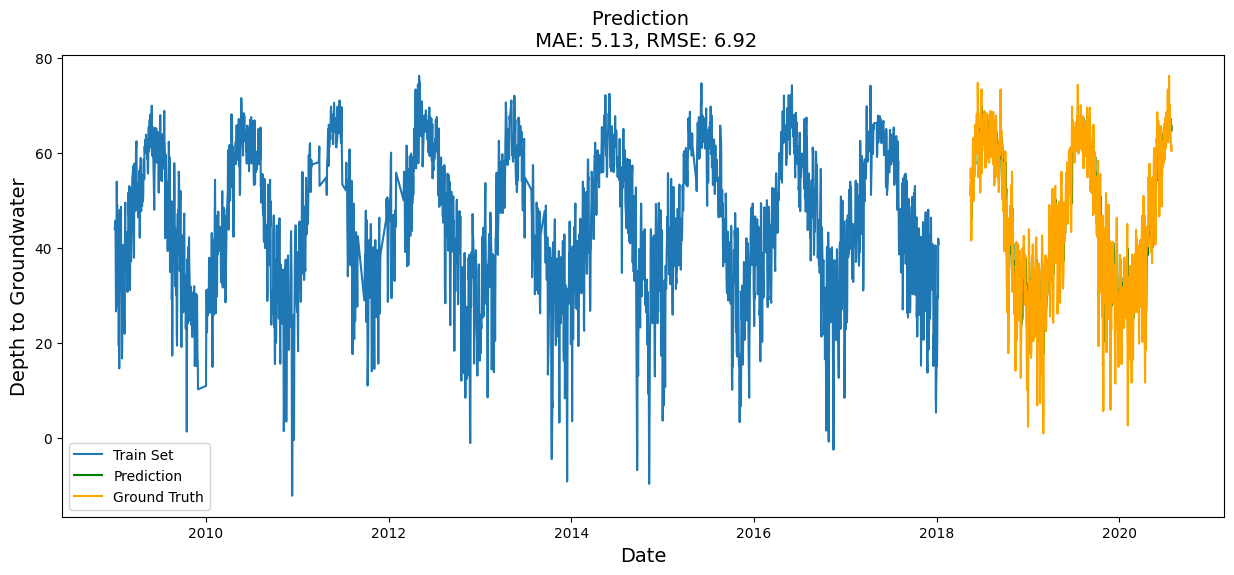

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from colorama import Fore
from keras.models import Sequential


# Build LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile and train model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=5, validation_data=(x_test, y_test))
model.summary()

# Predictions
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# RMSE and MAE calculations
score_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
score_mae = mean_absolute_error(y_test, test_predict)
print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

# Prepare x-axis data
x_train_ticks = new_df.iloc[:len(train_predict)]['Date']
x_test_ticks = new_df.iloc[-len(test_predict):]['Date']


# Plot results
f, ax = plt.subplots(1, figsize=(15, 6))

sns.lineplot(x=x_train_ticks, y=y_train.flatten(), ax=ax, label='Train Set')
sns.lineplot(x=x_test_ticks, y=test_predict.flatten(), ax=ax, color='green', label='Prediction')
sns.lineplot(x=x_test_ticks, y=y_test.flatten(), ax=ax, color='orange', label='Ground Truth')

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Depth to Groundwater', fontsize=14)

plt.show()


Detected Anomalies:
          Date  Actual  Predicted      Error  Anomaly
113 2018-09-13    73.4  58.918697  14.481303     True
128 2018-09-28    39.4  57.972878  18.572878     True
144 2018-10-14    17.9  44.590237  26.690237     True
160 2018-10-30    31.5  48.426064  16.926064     True
170 2018-11-11    17.3  35.237999  17.937999     True
172 2018-11-15    41.3  25.472462  15.827538     True
174 2018-11-17    20.6  37.429485  16.829485     True
188 2018-12-03    12.7  28.399761  15.699761     True
190 2018-12-10    40.0  25.337936  14.662064     True
208 2018-12-28    10.2  24.890953  14.690953     True
211 2018-12-31     9.5  31.938450  22.438450     True
212 2019-01-01     2.4  21.031273  18.631273     True
230 2019-01-22    20.4  35.227364  14.827364     True
245 2019-02-06    13.9  36.098907  22.198907     True
246 2019-02-07     6.9  23.190941  16.290941     True
257 2019-02-18     7.9  25.234827  17.334827     True
258 2019-02-19     7.4  22.511961  15.111961     True
268 2019

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

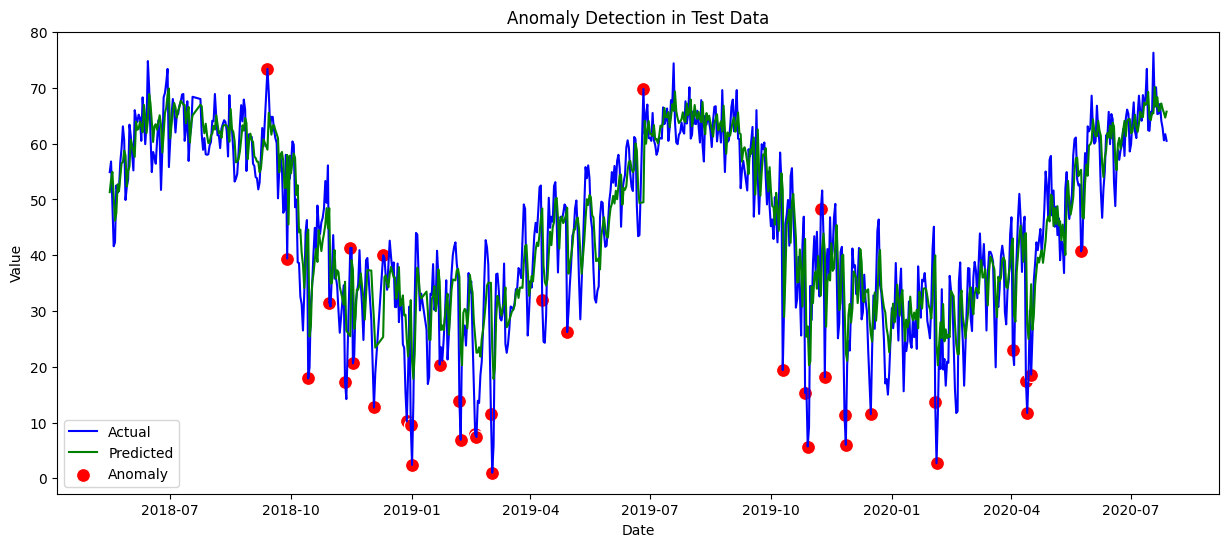

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute absolute error
errors = np.abs(y_test - test_predict)

# Define threshold (Mean + 2*Std Dev)
threshold = np.mean(errors) + 2 * np.std(errors)

# Identify anomalies (where error exceeds threshold)
anomalies = errors > threshold

# Get timestamps (assuming 'Date' column exists in new_df)
if 'Date' in new_df.columns:
    test_dates = new_df.iloc[-len(y_test):]['Date'].values  # Adjust to match test set size
else:
    test_dates = np.arange(len(y_test))  # Use index-based if no date column

# Create a DataFrame for anomalies
anomaly_df = pd.DataFrame({
    'Date': test_dates,
    'Actual': y_test.flatten(),
    'Predicted': test_predict.flatten(),
    'Error': errors.flatten(),
    'Anomaly': anomalies.flatten()
})

# Print detected anomalies
print("Detected Anomalies:")
print(anomaly_df[anomaly_df['Anomaly']])

# Plot results
plt.figure(figsize=(15, 6))

# Plot actual vs predicted values
sns.lineplot(x=test_dates, y=y_test.flatten(), label='Actual', color='blue')
sns.lineplot(x=test_dates, y=test_predict.flatten(), label='Predicted', color='green')

# Highlight anomalies
anomaly_points = anomaly_df[anomaly_df['Anomaly']]
sns.scatterplot(x=anomaly_points['Date'], y=anomaly_points['Actual'], color='red', label='Anomaly', s=100)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Anomaly Detection in Test Data')
plt.legend()
plt.show()


In [18]:
#STOC Stacked transformer with 1-D CNN is research method taken from a research paper 
# Time-series anomaly detection with stacked Transformer representations
# and 1D convolutional network

In [19]:
from keras.layers import Input, Dense, LSTM, Conv1D, Flatten, MultiHeadAttention, LayerNormalization, Dropout
from keras.models import Model
import tensorflow as tf

from tensorflow.keras.layers import Layer, MultiHeadAttention, LayerNormalization, Dropout, Dense
class TransformerEncoder(Layer):
    def _init_(self, embed_dim, num_heads, ff_dim, dropout_rate=0.1):
        super(TransformerEncoder, self)._init_()
        self.attention = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.norm1 = LayerNormalization()
        self.norm2 = LayerNormalization()
        self.dropout1 = Dropout(dropout_rate)
        self.dropout2 = Dropout(dropout_rate)
        self.ffn = keras.Sequential([
            Dense(ff_dim, activation="relu"),
            Dense(embed_dim)
        ])

    def call(self, inputs, training=None):  # ✅ Fix: Set default training=None
        attn_output = self.attention(inputs, inputs, training=training)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.norm1(inputs + attn_output)

        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.norm2(out1 + ffn_output)

In [20]:
from tensorflow.keras.layers import Concatenate

def build_STOC_model(input_shape, embed_dim=128, num_heads=4, ff_dim=256, num_layers=3, cnn_filters=64):
    inputs = Input(shape=input_shape)
    x = inputs
    encoder_outputs = []
    
    for _ in range(num_layers):
        x = TransformerEncoder(embed_dim, num_heads, ff_dim)(x)
        encoder_outputs.append(x)

    # Fix: Use Keras Concatenate instead of tf.concat
    x = Concatenate(axis=-1)(encoder_outputs)  

    x = Conv1D(filters=cnn_filters, kernel_size=3, padding="same", activation="relu")(x)
    x = Conv1D(filters=input_shape[-1], kernel_size=1, activation="linear")(x)

    model = keras.Model(inputs, x, name="STOC_TimeSeries")
    return model

In [21]:
print(f"Look-back window (sequence length): ")

# Confirm from x_train shape
print(f"x_train shape: {x_train.shape}")  # Should be (num_samples, sequence_length, num_features)
print(f"x_test shape: {x_test.shape}")

# Extract sequence length directly
sequence_length = x_train.shape[1]
print(f"Detected sequence length: {sequence_length}")


Look-back window (sequence length): 
x_train shape: (3017, 1, 52)
x_test shape: (781, 1, 52)
Detected sequence length: 1


In [22]:
# seq_length=52
# num_features=1
# model = build_STOC_model(input_shape=(seq_length, num_features))

# # Compile & Train
# model.compile(optimizer="adam", loss="mse")
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

In [23]:
import tensorflow as tf
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import Input, Dense, LSTM, Conv1D, Flatten, MultiHeadAttention, LayerNormalization, Dropout, Add
from keras.models import Model

# Define a Custom Transformer Encoder Layer
class TransformerEncoder(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerEncoder, self).__init__()
        self.attn = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.norm1 = LayerNormalization(epsilon=1e-6)
        self.norm2 = LayerNormalization(epsilon=1e-6)
        self.dense1 = Dense(ff_dim, activation="relu")
        self.dense2 = Dense(embed_dim)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training=False):
        attn_output = self.attn(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.norm1(inputs + attn_output)  # Skip connection

        ffn_output = self.dense1(out1)
        ffn_output = self.dense2(ffn_output)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.norm2(out1 + ffn_output)  # Skip connection

# Define the STOC Model
def build_STOC_model(input_shape, embed_dim=128, num_heads=4, ff_dim=256, num_layers=3, cnn_filters=64):
    inputs = Input(shape=input_shape)

    # LSTM Layer
    x = LSTM(embed_dim, return_sequences=True)(inputs)

    # Add Transformer Encoder Layers
    for _ in range(num_layers):
        x = TransformerEncoder(embed_dim, num_heads, ff_dim)(x)

    # CNN Layer for Spatial Features
    x = Conv1D(filters=cnn_filters, kernel_size=3, padding="same", activation="relu")(x)
    x = Flatten()(x)

    # Fully Connected Layers
    x = Dense(64, activation="relu")(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1)(x)  # Regression output

    model = Model(inputs, outputs)
    return model

# Set parameters
seq_length = 52
num_features = 1

# Build model
model = build_STOC_model(input_shape=(seq_length, num_features))

# Compile & Train
# Callbacks
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
model.compile(optimizer="adam", loss="mse")
# Fix Input Shape
x_train = x_train.reshape(x_train.shape[0], 52, 1)
x_test = x_test.reshape(x_test.shape[0], 52, 1)

# Train Model
model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stopping, lr_scheduler])



Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - loss: 536.2903 - val_loss: 197.6089 - learning_rate: 0.0010
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 257.9337 - val_loss: 82.3289 - learning_rate: 0.0010
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 159.1049 - val_loss: 94.0752 - learning_rate: 0.0010
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 150.2052 - val_loss: 142.7167 - learning_rate: 0.0010
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 161.1452 - val_loss: 94.6590 - learning_rate: 0.0010
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 166.2841 - val_loss: 186.1541 - learning_rate: 0.0010
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 176.5558
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 176.5153 - val_loss: 92.5391 - learning_rate: 0.0010
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 137.0387 - val_loss:

In [24]:
# print(y_pred.shape)  # Debugging


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
y_pred shape: (781, 1)
y_test shape: (781, 1, 1)


<Figure size 1200x600 with 0 Axes>

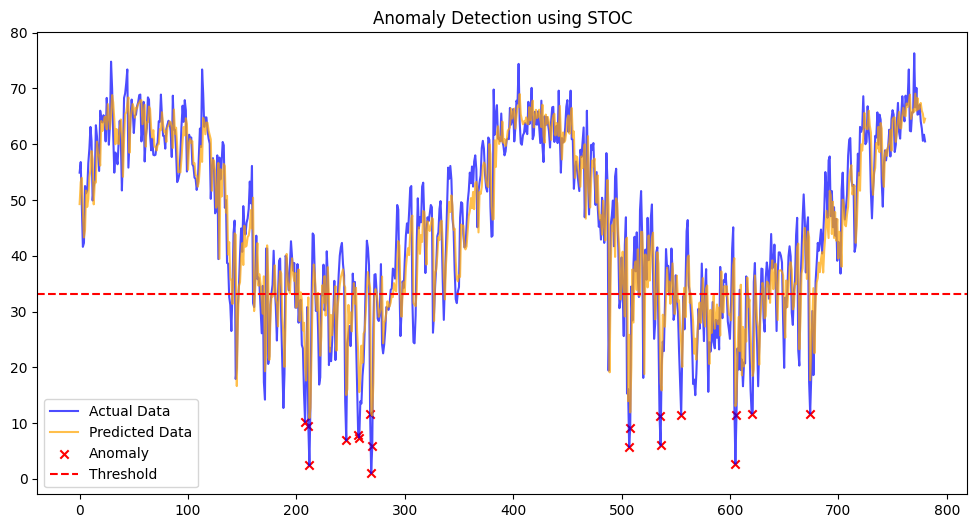

In [25]:
import numpy as np
import matplotlib.pyplot as plt


# Predict future time-series values
y_pred = model.predict(x_test)

# Fix: Properly expand y_test to match y_pred
y_test = np.expand_dims(y_test, axis=-1)  # Reshape y_test to (952, 1, 1)
y_test = np.repeat(y_test, y_pred.shape[1], axis=1)  # Repeat to match (952, 48, 1)

# Compute Anomaly Score (Mean Absolute Error)
anomaly_scores = np.mean(np.abs(y_pred - y_test), axis=(1, 2))  # Reduce to (952,)

# Set threshold using Mean + 3*StdDev (statistical approach)
threshold = np.mean(anomaly_scores) + 3 * np.std(anomaly_scores)

# Flag anomalies
anomalies = anomaly_scores > threshold

plt.figure(figsize=(12, 6))

# Debug shapes
print(f"y_pred shape: {y_pred.shape}")
print(f"y_test shape: {y_test.shape}")

# Adjust indexing dynamically
y_pred_plot = y_pred[:, 0] if y_pred.ndim == 2 else y_pred[:, 0, 0]
y_test_plot = y_test[:, 0] if y_test.ndim == 2 else y_test[:, 0, 0]

plt.figure(figsize=(12, 6))
plt.plot(y_test_plot, label="Actual Data", color="blue", alpha=0.7)
plt.plot(y_pred_plot, label="Predicted Data", color="orange", alpha=0.7)

# Plot anomalies
plt.scatter(np.where(anomalies)[0], y_test_plot[anomalies], color="red", label="Anomaly", marker="x")

# Threshold line
plt.axhline(y=threshold, color="red", linestyle="--", label="Threshold")

plt.legend()
plt.title("Anomaly Detection using STOC")
plt.show()


In [26]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Predict future time-series values
# y_pred = model.predict(x_test)

# # Ensure y_test has the correct shape
# y_test = np.expand_dims(y_test, axis=-1)  # Reshape if needed
# y_test = np.repeat(y_test, y_pred.shape[1], axis=1)  # Match y_pred shape

# # Compute Anomaly Score (Mean Absolute Error)
# anomaly_scores = np.mean(np.abs(y_pred - y_test), axis=(1, 2))  # Reduce to (781,)

# # Set threshold using Mean + 3*StdDev
# threshold = np.mean(anomaly_scores) + 3 * np.std(anomaly_scores)

# # Flag anomalies
# anomalies = anomaly_scores > threshold

# # **Fix: Convert to 1D**
# y_pred_plot = y_pred.squeeze()  # Convert (781, 1) → (781,)
# y_test_plot = y_test.squeeze()  # Convert (781, 1, 1) → (781,)

# # **Plot results**
# plt.figure(figsize=(12, 6))
# plt.plot(y_test_plot, label="Actual Data", color="blue", alpha=0.7)
# plt.plot(y_pred_plot, label="Predicted Data", color="orange", alpha=0.7)

# # **Plot anomalies (Fix applied)**
# plt.scatter(np.where(anomalies)[0], y_test_plot[anomalies], color="red", label="Anomaly", marker="x")

# # **Threshold line**
# plt.axhline(y=threshold, color="red", linestyle="--", label="Threshold")

# plt.legend()
# plt.title("Anomaly Detection using STOC")
# plt.show()


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


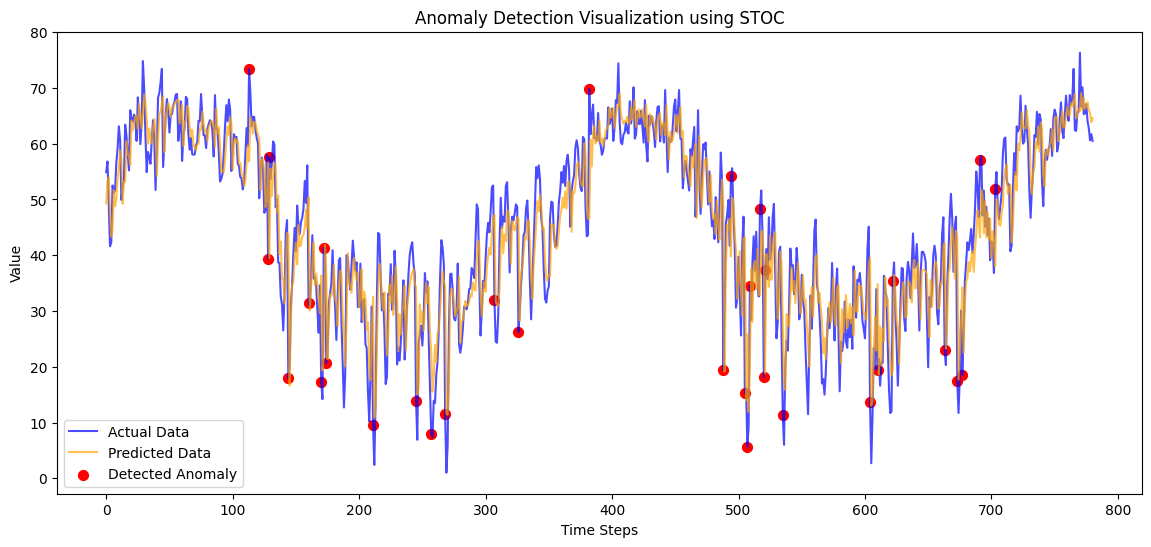

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Predict using the STOC model
y_pred = model.predict(x_test)

# Ensure y_test has the correct shape
y_test = np.squeeze(y_test)  # Remove unnecessary dimensions (should be 1D)
y_pred = np.squeeze(y_pred)  # Ensure predictions are 1D

# Compute Anomaly Score (Mean Absolute Error)
anomaly_scores = np.abs(y_pred - y_test)  # Get absolute error
threshold = np.mean(anomaly_scores) + 2 * np.std(anomaly_scores)  # Set threshold

# Flag anomalies
anomalies = anomaly_scores > threshold

# Indices of detected anomalies
anomaly_indices = np.where(anomalies)[0]

# Plot actual vs predicted values
plt.figure(figsize=(14, 6))
plt.plot(y_test, label="Actual Data", color="blue", alpha=0.7)
plt.plot(y_pred, label="Predicted Data", color="orange", alpha=0.7)

# Highlight detected anomalies correctly
plt.scatter(anomaly_indices, y_test[anomaly_indices], color="red", label="Detected Anomaly", marker="o", s=50)

# Threshold line
#plt.axhline(y=threshold, color="red", linestyle="--", label="Anomaly Threshold")

# Labels and legend
plt.legend()
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.title("Anomaly Detection Visualization using STOC")
plt.show()


In [28]:
#wgan